In [1]:
import geopandas as gpd

c:\softwares\python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [21]:
# Read data for the State of New York
land_type = gpd.read_file('./data/DEC_lands/DEC_lands/DEC_lands.shp')
points_of_interest = gpd.read_file("./data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
roads_trails = gpd.read_file("data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
boundary = gpd.read_file("data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")
land_type.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [22]:
points_of_interest.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,None,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,None,9,ALLEGANY,None,14561,N,POINT (193656.734 4679632.500)


In [30]:
# Get accessible campsites
accessible_campsites = points_of_interest[(points_of_interest.ASSET == 'PRIMITIVE CAMPSITE')
                                          & (points_of_interest.ACCESSIBLE == 'Y')].copy()
inaccessible_campsites = points_of_interest[(points_of_interest.ASSET == 'PRIMITIVE CAMPSITE')
                                          & (points_of_interest.ACCESSIBLE == 'N')].copy()

In [36]:
roads_trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
0,208,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1583.181399,1577.112643,"LINESTRING (511367.312 4804744.000, 511442.406..."
1,211,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,948.150638,945.366235,"LINESTRING (512806.962 4804560.806, 512796.625..."
2,212,AFP,FERRIS LAKE WILD FOREST,PARKER VLY TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,3862.887604,3853.119292,"MULTILINESTRING ((515866.032 4804650.001, 5158..."
3,229,AFP,FERRIS LAKE WILD FOREST,WAGONERS LOOP,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,10536.778083,10485.458536,"LINESTRING (533975.501 4796126.500, 533992.812..."
4,233,AFP,FERRIS LAKE WILD FOREST,SHERIFF LAKE TRAIL,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1439.438752,1432.490031,"LINESTRING (531496.700 4799892.919, 531482.375..."


In [38]:
roads_trails.ASSET.value_counts()
foot_trails = roads_trails[roads_trails.ASSET == 'FOOT TRAIL'].copy()

In [12]:
df.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

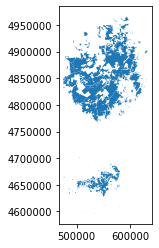

In [16]:
# Filter out wild lands from data
wild_lands = df[df.CLASS.isin(["WILD FOREST", "WILDERNESS"])].copy()
wild_lands.plot()

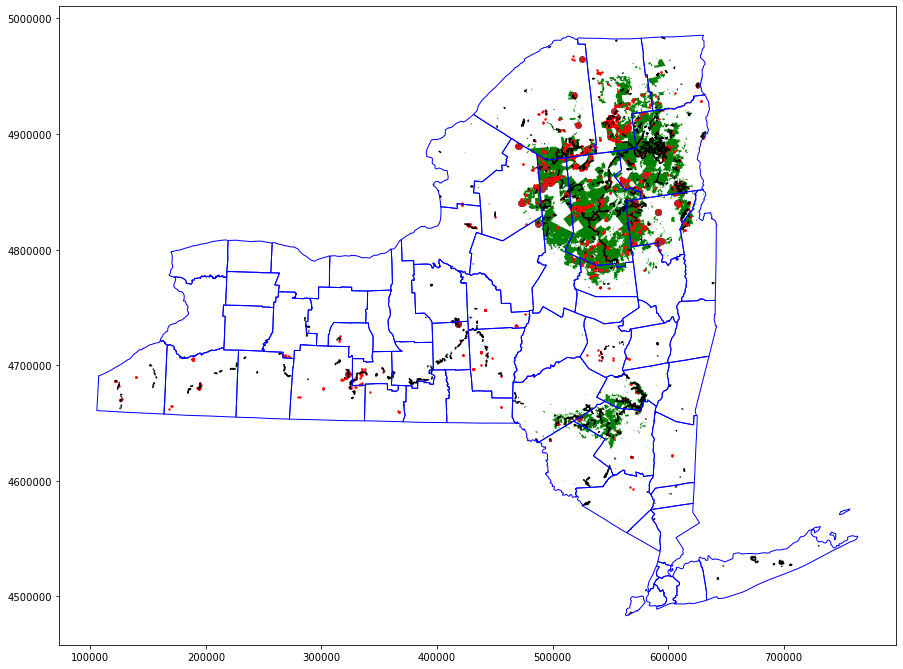

In [39]:
ax = boundary.plot(figsize=(15, 15), color='None', edgecolor='blue', zorder=3)
wild_lands.plot(color='green', ax=ax)
accessible_campsites.plot(color='brown', ax=ax)
inaccessible_campsites.plot(color='red', markersize=2, ax=ax)
foot_trails.plot(color='black', markersize=2, ax=ax)